In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('penguins')   # 펭귄 dataset load

df.dropna(inplace=True) #df의 결측치들은 행째로 제거 (inplace=True를 통해 즉시 데이터에 적용)

# 수치 데이터만 저장한 데이터셋 생성
dataset = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [6]:
dataset

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [20]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=5, random_state=42)

# 학습하기
km.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [21]:
km.labels_

array([2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 1, 1, 4,
       4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,

In [22]:
# 0, 1, 2에 해당되는 샘플의 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([60, 57, 89, 65, 62], dtype=int64))

In [23]:
# 중심을 찾기위해 반복 수행한 횟수는 확인
km.n_iter_

4

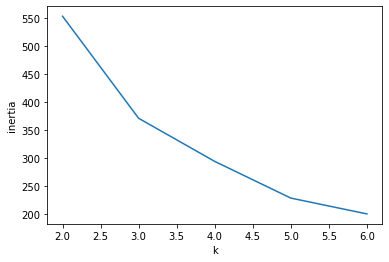

In [24]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()